# Fundamentals of Data Analysis Project 2019

Peter McGowan
G00190832

## Introduction

Placeholder: images and intro

## Setup

In [1]:
# Import pandas for managing data
# Import matplotlib.pyplot and seaborn for visualisations
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Magic command to ensure that plots render inline
%matplotlib inline

In [2]:
# Control Seaborn aesthetics
# Use darkplot plot style for contrast
sns.set_style("darkgrid")
# Set the default colour palette
sns.set_palette("colorblind")

The tips dataset is conveniently included with Seaborn as a Pandas dataframe - so I can call it directly. I'll load it as "df".

In [3]:
df = sns.load_dataset("tips")

## Description

### Checking the Dataset

Before producing descriptive statistics, its a good idea to check the integrity and completeness of the dataset.

In [4]:
# Check the head
df.head(n=5)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [5]:
# Check the tail
df.tail(n=5)

,total_bill,tip,sex,smoker,day,time,size
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2
243,18.78,3.00,Female,No,Thur,Dinner,2


In [26]:
# Generate info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
total_bill    244 non-null float64
tip           244 non-null float64
sex           244 non-null category
smoker        244 non-null category
day           244 non-null category
time          244 non-null category
size          244 non-null int64
dtypes: category(4), float64(2), int64(1)
memory usage: 7.2 KB


Checking against the [Github page](https://github.com/mwaskom/seaborn-data/blob/master/tips.csv) for the tips dataset, I expect to see 244 entries - the data import has been successful and now I can move onto to a more detailed analysis.

### Basic Statistics

The describe() function in Pandas is very useful for an initial look at the properties of a dataset. I've also rounded all outputs to three decimal places - as I am most interested in analysing monetary amounts (which should be given to two decimal places), an additional decimal place should be sufficient for the purposes of analysis.

In [6]:
# Describe the dataset
round(df.describe(),3)

,total_bill,tip,size
count,244.000,244.000,244.000
mean,19.786,2.998,2.570
std,8.902,1.384,0.951
min,3.070,1.000,1.000
25%,13.348,2.000,2.000
50%,17.795,2.900,2.000
75%,24.127,3.562,3.000
max,50.810,10.000,6.000


Describe() only produces an output on numerical columns - here it includes columns for total_bill (the total bill amount - a float), tip (the tip amount associated with the bill - float) and size (the size of the party billed - integer). I can make the following observations:
* Each column has a count of 244, indicating that there are no missing values;
* The means seem reasonable (pending an analysis of the distribution) - just under \\$20 for the mean total bill, a mean tip of \\$3 (equating to 15% of the average total bill which seems realistic) and the mean party size is just over 2.5;
* The Standard Deviation indicates the dispersion - as expected, the total bill has a fairly wide dispersion whereas the smaller values for tip and size shows that their values tend relatively closely to the mean;
* The Min and Max values lead to some interesting observations:
    * The smallest bill recorded is quite low (\\$3.07) - most likely referring to a single customer ordering 1-2 items. The largest bill is \\$50.81 which seems fairly unremarkable;
    * The smallest tip is \\$1.00 - tipping with a single dollar bill seems likely. The largest tip is $10.00 - another convenient denomination of money;
    * The size varies between 1 and 6. A minimum different to 1 would be unusual, whereas 6 may represent the largest table size available;
* The percentiles (25%, 50%/ median, 75%) are quite in line with the other observations. The median value is lower than the mean for all columns - I would therefore expect that the distribution of all columns is not particularly symmetrical.

Before moving on I'll also sum the numerical columns to get an appreciation of what the dataset represents.

In [7]:
# Sum numerical columns only
df.sum(axis = 0, skipna = True, numeric_only = True)

total_bill    4827.77
tip            731.58
size           627.00
dtype: float64

Therefore the dataset is representing a total of 627 customers in 244 parties, spending a total of \\$4827.77 and tipping \\$731.58 on that.

### Distribution

The aim of this analysis mainly is to investigate whether a relationship exists between the total bill and the tip. Firstly I will look at the distribution - I had make several assumptions above that I'd like to check out. I'll display the histograms of both columns using Seaborn's distplot() function. I also want to see the mean dollar value for each, so I'll display it as a vertical dashed line with the same colour as the distplot.

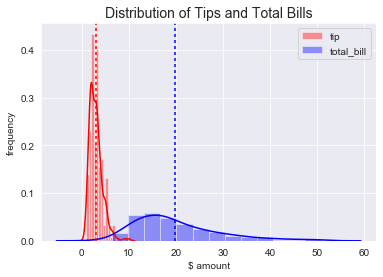

In [81]:
# Visualising the distribution of the total_bill and tip columns
sns.distplot(df['tip'], label = "tip", color = 'r')
sns.distplot(df['total_bill'], label = "total_bill", color = 'b')
#sns.distplot(df['size'], label = "size")
plt.xlabel("$ amount")
plt.ylabel("frequency")

plt.axvline(x = np.mean(df['tip']), color = 'r', dashes=(2,2,2,2))
plt.axvline(x = np.mean(df['total_bill']), color = 'b', dashes=(2,2,2,2))

plt.title('Distribution of Tips and Total Bills', fontsize=14)
plt.legend()

In [9]:
# importing scipy.stats to use the skewness function
import scipy.stats as ss

In [10]:
print("tip skewness: ", ss.skew(df['tip']))
print("total_bill skewness: ", ss.skew(df['total_bill']))

tip skewness:  1.4564266884221506
total_bill skewness:  1.1262346334818638


Both figures are positive, confirming that the columns are both positively skewed.

Before moving on I'd like to look into the non-numerical columns a little:
* sex: male or female;
* smoker: yes or no;
* day: the values in the head() and tail() outputs only show certain days - it's worth having a look in more detail to see if it only covers certain days;
* time: only dinner is shown in the head() and tail() outputs - I'll investigate this further also;

Firstly I'll generate the unique values for the day column and the time column respectively.

In [11]:
df.day.unique()

[Sun, Sat, Thur, Fri]
Categories (4, object): [Sun, Sat, Thur, Fri]

In [12]:
df.time.unique()

[Dinner, Lunch]
Categories (2, object): [Dinner, Lunch]

There are therefore only records for Thursday through Sunday, and for Lunch and Dinner. I can plot the distributions of these separately:

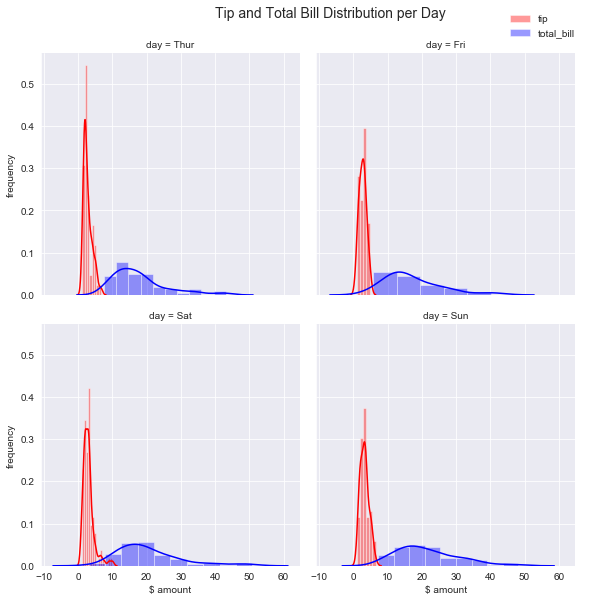

In [100]:
# Build a 2x2 facet grid plot with a distplot for each unique value in the "day" column
g = sns.FacetGrid(df, col="day", height=4, col_wrap=2)
g = g.map(sns.distplot, "tip", label = "tip", color='r')
g = g.map(sns.distplot, "total_bill", label = "total_bill", color='b')
g.axes[2].set_xlabel('$ amount')
g.axes[3].set_xlabel('$ amount')
g.axes[0].set_ylabel('frequency')
g.axes[2].set_ylabel('frequency')

g.fig.suptitle('Tip and Total Bill Distribution per Day', y=1.04, fontsize=14)
g.add_legend(bbox_to_anchor=(0.9,1))

This tells us that the distributions are slightly different on each day for both tips and total_bill. In addition, the peaks for both are somewhat higher on the Thrursday than for the other three days. I'll also plot the distribution of each for Lunch and Dinner separately:

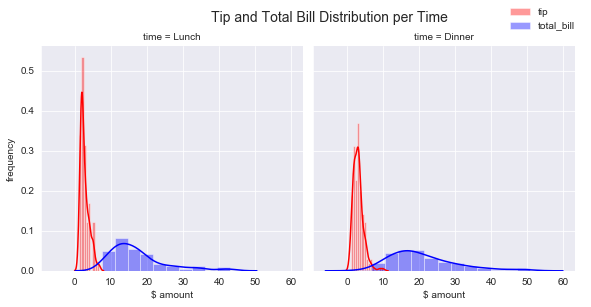

In [99]:
# Build a 1x2 facet grid plot with a distplot for each unique value in the "time" column
g = sns.FacetGrid(df, col="time", height=4, col_wrap=2)
g = g.map(sns.distplot, "tip", label = "tip", color='r')
g = g.map(sns.distplot, "total_bill", label = "total_bill", color='b')
g.axes[0].set_xlabel('$ amount')
g.axes[1].set_xlabel('$ amount')
g.axes[0].set_ylabel('frequency')

g.fig.suptitle('Tip and Total Bill Distribution per Time', y=1.04, fontsize=14)
g.add_legend(bbox_to_anchor=(0.9,1))

The distribution of the tip and total_bill columns are both narrower for lunch bills than for dinner bills.

## Regression

Next we need to determine whether or not there is a relationship between the total bill and tip amount.

### Visually Relating Tips and Total Bills

In [ ]:
Firstly, it will be helpful to look at some visual comparisons

We can plot boxplots of the tip and total_bill columns. Instead of creating separate plots it should be easier to appreciate their similarities and differences by displaying on a single plot. This will require the dataframe to be "melted" - it will be restructured with columns combined etc. In this case we will create a melted dataframe with the following:
* day - unpivoted;
* time - unpivoted;
* item - new column, its value will state whether the row refers to a tip or a total_bill;
* amount - a float with the tip or total_bill amount as appropriate.

*** https://www.geeksforgeeks.org/python-pandas-melt/

In [129]:
# Set the day and time columns as id_vars - this will ensure that they remain unpivoted
dfmelted = df.melt(id_vars=["day", "time"], value_vars=["total_bill", "tip"], var_name="item", value_name="amount")
dfmelted

,day,time,item,amount
0,Sun,Dinner,total_bill,16.99
1,Sun,Dinner,total_bill,10.34
2,Sun,Dinner,total_bill,21.01
3,Sun,Dinner,total_bill,23.68
4,Sun,Dinner,total_bill,24.59
5,Sun,Dinner,total_bill,25.29
6,Sun,Dinner,total_bill,8.77
7,Sun,Dinner,total_bill,26.88
8,Sun,Dinner,total_bill,15.04
9,Sun,Dinner,total_bill,14.78


The melted dataframe contains 488 rows - as the original dataframe contained 244, and we melted two columns together, this is correct. The boxplots can now be generated.

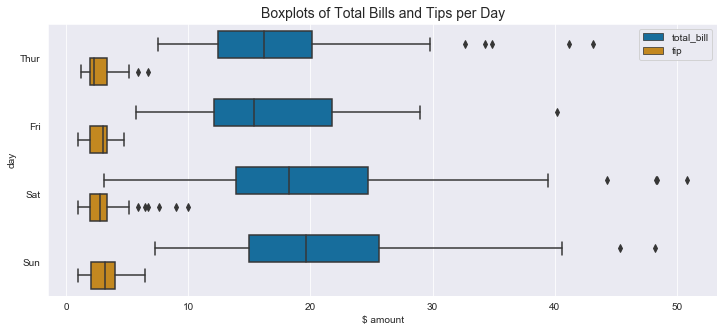

In [125]:
# Set size in order to see plot elements correctly
fig, ax = plt.subplots(figsize=(12, 5))

sns.boxplot(data=dfmelted, y="day", x="amount", hue="dataset")

plt.xlabel("$ amount")

plt.title('Boxplots of Total Bills and Tips per Day', fontsize=14)
plt.legend(loc="upper right", bbox_to_anchor=(1, 1))

### Bivariate Plots

Text(0.5, 1.03, 'Jointplot - Tips vs Total Bill Amounts')

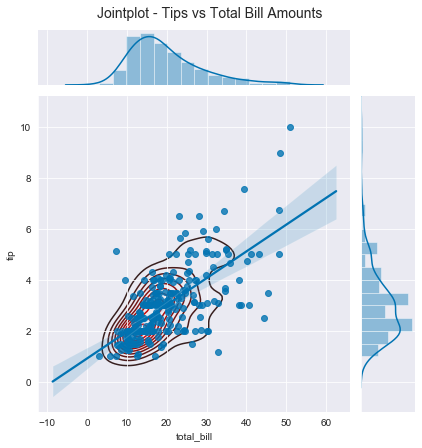

In [167]:
g = sns.jointplot(x ='total_bill', y ='tip', kind="reg", data = df).plot_joint(sns.kdeplot, zorder=0, n_levels=10, color="r")

g.fig.suptitle("Jointplot - Tips vs Total Bill Amounts", y=1.03, fontsize=14)

We can go one step further and visualise the linear relationshop through the observations with lmplot.

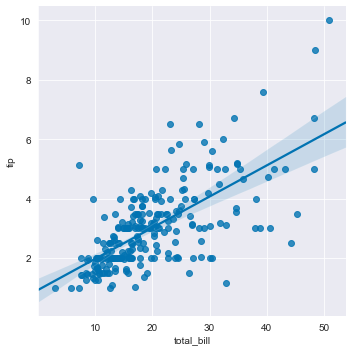

In [19]:
sns.lmplot(x="total_bill", y="tip", data=df)

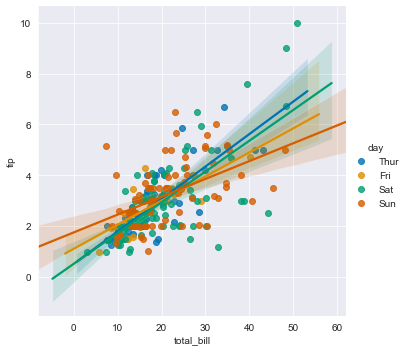

In [20]:
sns.lmplot(x="total_bill", y="tip", hue="day", data=df)

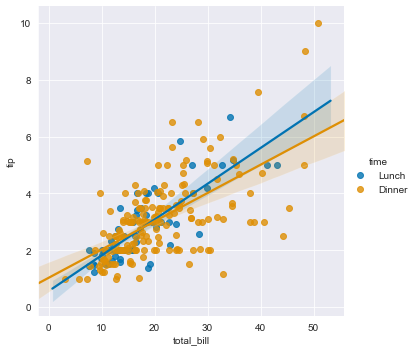

In [21]:
sns.lmplot(x="total_bill", y="tip", hue="time", data=df)

The lmplot() gives an indication of the linear relationship between the two variables, but it will be necessary to look at it in more detail. This can be achieved by calculating the Cost value.

The slope (m) can be calculated using the following equation: $$ m = \frac{\sum_i (x_i - \bar{x}) (y_i - \bar{y})}{\sum_i (x_i - \bar{x})^2}$$

Where:
* $x_i, y_i$ = ith value of x, y
* $\bar{x}, \bar{y}$ = mean value of x, y


Once the slope has been calculated, the y-intercept (c) can be worked out as follows: $$ c = \bar{y} - m \bar{x} $$

In [22]:
# Calculate slope (m) and y-intercept (c)

# Create variables to hold the values of the relevant columns
x_i = df['total_bill']
y_i = df['tip']

# Create variables to hold the mean values of the relevant columns
x_mean = np.mean(df['total_bill'])
y_mean = np.mean(df['tip'])

# Calculate m
m = np.sum((x_i - x_mean) * (y_i - y_mean)) / np.sum((x_i - x_mean)**2)

# Calculate c
c = y_mean - m * x_mean

print("m: %10.8f\nc: %10.8f" % (m, c))

m: 0.10502452
c: 0.92026961


From here, the Cost function can be used: $$ Cost(m,c) = {\sum_i (y_i - m x_i - c )^2}$$

In [23]:
# Implement the above formula directly
np.sum((y_i - (m * x_i) - c)**2)

252.78874385077603

I can also try out the numpy polyfit() function that will output m and c as elements of a 1x1 array.

In [24]:
np.polyfit(df['total_bill'], df['tip'], 1)

array([0.10502452, 0.92026961])

The results match those manually calculated, so I can feel comfortable using this function for further analysis.

Text(9.550000000000004, 0.5, 'frequency')

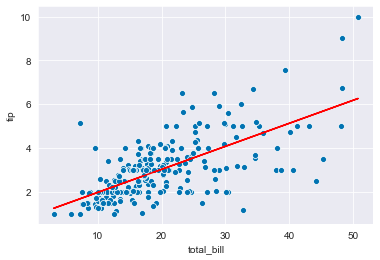

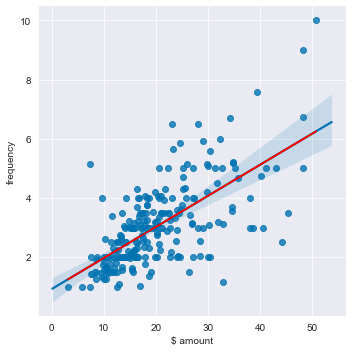

In [27]:
sns.scatterplot(x="total_bill", y="tip", data=df)
plt.plot(x_i, m * x_i + c, color='r', label='Best fit line')
sns.lmplot(x="total_bill", y="tip", data=df)
plt.plot(x_i, m * x_i + c, color='r', label='Best fit line')

plt.xlabel("$ amount")
plt.ylabel("frequency")


** Discussion of the above
** Coefficient of determination??

** Add discussion on model fitting, further checks etc https://seaborn.pydata.org/tutorial/regression.html

## Analyse

### Using the Data

We now have some handle on the data - what it consists of and the distribution of some of its varibles. But what is it useful for? It will be helpful to take the point of view of an employee of the restaurant. For convenience we'll assume that the employee waits tables on certain days of the week and has recorded certain information over a number of shifts with the aim of selecting work patterns that will maximise their earnings -  i.e. the employee wants to choose shifts and tables in order to get the largest tips!

## References